<a href="https://colab.research.google.com/github/keshavramaswamy/ipython-notebooks/blob/master/disaster_nlp_fastai_nb3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
from fastai.text import *

In [0]:
from pathlib import PosixPath

In [0]:
path = PosixPath('.')

In [0]:
df = pd.read_csv(path/'train_fastai.csv')

In [6]:
data_lm = TextLMDataBunch.from_csv(path, 'train_fastai.csv', text_cols='text', label_cols='target')

In [7]:
data_clas = TextClasDataBunch.from_csv(path, 'train_fastai.csv', vocab=data_lm.train_ds.vocab, 
                                       bs=32, text_cols='text', label_cols='target')

In [0]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')

In [0]:
data_lm = load_data(path, 'data_lm_export.pkl')
data_clas = load_data(path, 'data_clas_export.pkl', bs=16)

In [0]:
f_score = partial(fbeta, thresh=0.5, beta=1)

In [0]:
acc = partial(accuracy_thresh, thresh=0.5)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


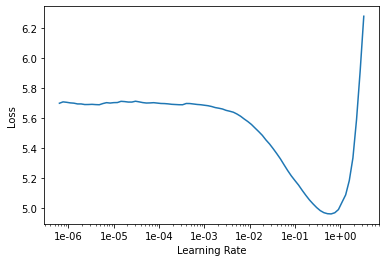

In [29]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-01/2

In [41]:
lr

0.05

In [42]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,4.526431,3.394789,0.414038,05:24
1,3.739930,3.213455,0.447371,05:23
2,3.251241,3.165098,0.457589,05:20
3,2.835821,3.135438,0.466344,05:24
4,2.517504,3.125240,0.467882,05:22


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

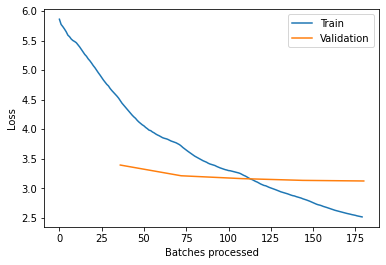

In [46]:
learn.recorder.plot_losses()

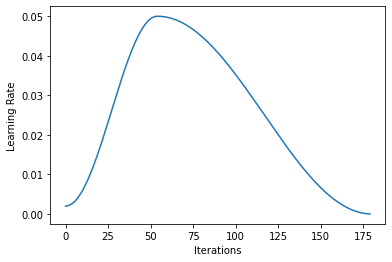

In [48]:
learn.recorder.plot_lr()

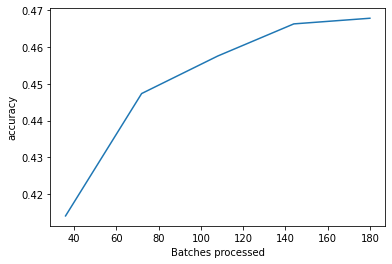

In [49]:
learn.recorder.plot_metrics()

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


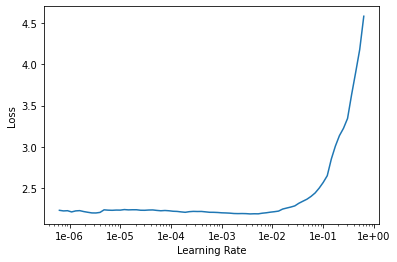

In [50]:
learn.lr_find()
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(5, slice(1e-3, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,2.221549,3.113405,0.472793,08:04
1,2.125557,3.136031,0.475695,07:59
2,1.881731,3.208060,0.483135,08:00
3,1.591087,3.326802,0.481969,07:59
4,1.364508,3.389799,0.481845,08:01


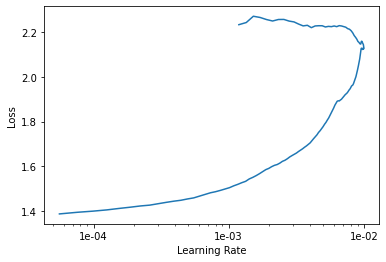

In [52]:
learn.recorder.plot()

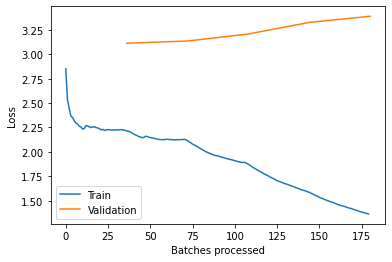

In [53]:
learn.recorder.plot_losses()

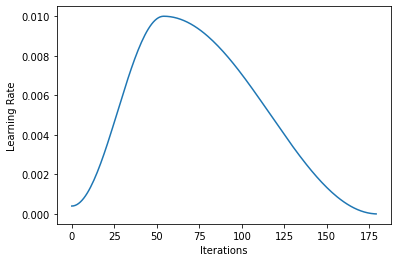

In [54]:
learn.recorder.plot_lr()

In [0]:
learn.load('stage-1');

In [0]:
learn.unfreeze()

In [57]:
learn.fit_one_cycle(1, slice(1e-3, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,2.281889,3.098640,0.470933,08:05


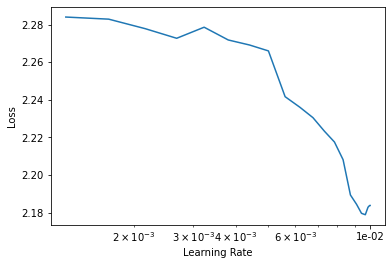

In [58]:
learn.recorder.plot()

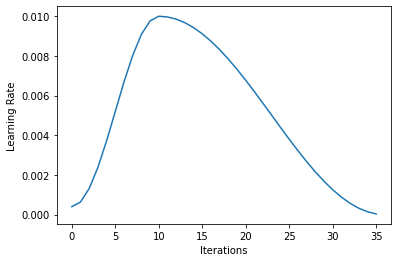

In [61]:
learn.recorder.plot_lr()

In [0]:
learn.save('stage-2')

In [13]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,3.523723,3.273463,0.428100,07:56


In [14]:
learn.load('stage-1')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (6090 items)
x: LMTextList
xxbos xxmaj strange to xxunk xxunk portion him till give voice deluge : xxunk http : / / t.co / xxunk m,xxbos xxmaj traffic xxmaj collision - xxmaj no xxmaj injury : xxup i5 s at xxup i5 s 43rd xxmaj ave offramp xxmaj south xxmaj sac http : / / t.co / ct9ejxolpu,xxbos xxunk xxmaj your hot take on xxmaj canada 's xxunk garbage - bot ( destroyed in xxmaj philly ) was xxunk needed .,xxbos http : / / t.co / xxunk xxmaj jacksonville family bands together as memorial is planned for toddler who ... - floridaû _ http : / / t.co / xxunk,xxbos xxunk would n't that have sunk the sub ?
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1523 items)
x: LMTextList
xxbos xxmaj news : ' xxmaj islamic xxmaj state claims suicide bombing at xxmaj saudi xxmaj arabian mosque ' http : / / t.co / xxunk,xxbos xxmaj you either ride with us or collide with us . xxmaj it 's as simple as that for me and my niggas .,xxbos xxmaj xxunk x

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


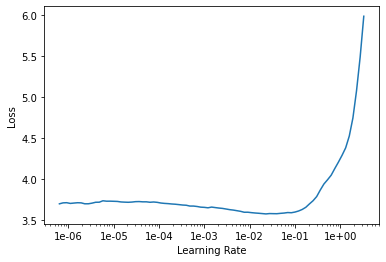

In [17]:
learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-2,1e+0))

epoch,train_loss,valid_loss,accuracy,time
0,4.923596,4.162996,0.361062,08:22
1,4.407823,3.825985,0.388864,08:06


In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [21]:
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6090 items)
x: TextList
xxbos xxup xxunk said they can see smoke coming from the xxunk on xxunk xxmaj street in xxmaj xxunk but no flames .,xxbos xxup video : xxmaj xxunk xxmaj xxunk xxmaj journalist xxmaj xxunk xxmaj predicted xxmaj his xxmaj own xxmaj death http : / / t.co / xxunk via xxunk,xxbos xxmaj xxunk of the # trees # deep water loving # xxmaj lake xxmaj tahoe . xxmaj and no # forest fires https : / / t.co / xxunk,xxbos xxmaj internet xxunk to be subject to new xxunk rules in xxup eu ... http : / / t.co / xxunk,xxbos xxmaj so does xxmaj austin smoke too since he agreed to that name or what ? xxup ûó xxmaj lol no http : / / t.co / xxunk
y: CategoryList
1,0,0,0,0
Path: .;

Valid: LabelList (1523 items)
x: TextList
xxbos xxmaj one man xxunk shot another wounded on xxmaj vermont xxmaj street # xxmaj buffalo - http : / / t.co / xxunk,xxbos xxmaj rescuers are searching for hundreds of migrants in the xxmaj mediterranean after a 

In [0]:
learn.freeze()

In [23]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


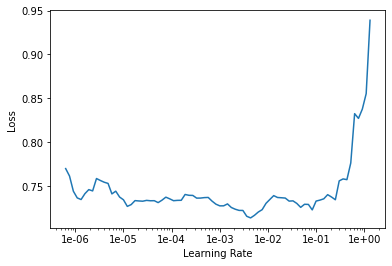

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.625139,0.588420,0.707157,03:59


In [26]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.587067,0.824815,0.703217,05:17


In [27]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.578735,0.544227,0.743270,08:48


In [28]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.541541,0.568866,0.753775,14:13
1,0.565840,0.551946,0.745896,14:28


In [29]:
learn.predict("There is sweet!")[2].numpy()

array([0.79236, 0.20764], dtype=float32)

In [0]:
test = pd.read_csv('test.csv')

In [0]:
submission = pd.DataFrame()
submission['id'] = test['id']

In [0]:
text_vals = list(test.text.values)

In [34]:
preds = []
for idx, val in enumerate(text_vals):
    print(f'{idx*100/len(text_vals)}% done')
    preds.append((learn.predict(val)[2].numpy()[1] > 0.5).astype("int32"))

0.0% done
0.030646644192460926% done
0.06129328838492185% done
0.09193993257738278% done
0.1225865767698437% done
0.15323322096230463% done
0.18387986515476556% done
0.21452650934722647% done
0.2451731535396874% done
0.2758197977321483% done
0.30646644192460926% done
0.3371130861170702% done
0.36775973030953113% done
0.398406374501992% done
0.42905301869445295% done
0.4596996628869139% done
0.4903463070793748% done
0.5209929512718358% done
0.5516395954642966% done
0.5822862396567576% done
0.6129328838492185% done
0.6435795280416794% done
0.6742261722341404% done
0.7048728164266013% done
0.7355194606190623% done
0.7661661048115231% done
0.796812749003984% done
0.827459393196445% done
0.8581060373889059% done
0.8887526815813669% done
0.9193993257738278% done
0.9500459699662887% done
0.9806926141587496% done
1.0113392583512106% done
1.0419859025436715% done
1.0726325467361324% done
1.1032791909285933% done
1.1339258351210542% done
1.1645724793135153% done
1.1952191235059761% done
1.225865

In [0]:
submission['target'] = preds

In [0]:
submission.to_csv('fastaiv3.csv', index=0)

In [37]:
1e-2/2

0.005

In [41]:
1e-2/2

0.005